# Bank Customer Data Prep
## Clean and explore bank customer data to prepare it for machine learning models

In [1]:
# Objective 1
# Import & QA the data
# Your first objective is to import & join two customer data tables, then remove duplicate rows & columns and fill in missing values.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Import the data from both tabs in the "Bank_Churn_Messy" Excel file
customer = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name=0)

In [4]:
customer

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78


In [5]:
account = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name=1)

In [6]:
account

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...
9997,15569892,€57369.61,1,Yes,10,Yes,0
9998,15584532,€0.0,1,Yes,7,Yes,1
9999,15682355,€75075.31,2,No,3,No,1
10000,15628319,€130142.79,1,No,4,No,0


In [7]:
# Use a left join to join "Account_Info" to "Customer_Info" using the CustomerID column

In [8]:
df = account.merge(customer, how='left', on='CustomerId')

In [9]:
df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,1,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,8,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,1,€93826.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,€75075.31,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,3,€92888.52
10000,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10001,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10002,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78


In [10]:
# Check for and remove duplicate rows and columns
df.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,€125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,€0.0,2,No,5,No,0,Obijiaku,771,France,Male,39.0,5,€96270.64
9996,15569892,€57369.61,1,Yes,10,Yes,0,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,€0.0,1,Yes,7,Yes,1,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,€75075.31,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,3,€92888.52


In [12]:
df.drop('Tenure_y', axis=1, inplace=True)

In [13]:
df.rename(columns={'Tenure_x': 'Tenure'}, inplace=True)

In [14]:
df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,€101348.88
1,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,€112542.58
2,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,€113931.57
3,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,€93826.63
4,15737888,€125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,€79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,€0.0,2,No,5,No,0,Obijiaku,771,France,Male,39.0,€96270.64
9996,15569892,€57369.61,1,Yes,10,Yes,0,Johnstone,516,French,Male,35.0,€101699.77
9997,15584532,€0.0,1,Yes,7,Yes,1,Liu,709,FRA,Female,36.0,€42085.58
9998,15682355,€75075.31,2,No,3,No,1,Sabbatini,772,Germany,Male,42.0,€92888.52


In [15]:
# Objective 2
# Clean the data
# Your second objective is to clean the data by fixing inconsistencies in labeling, handling erroneous values, and fixing currency fields.

In [16]:
# Check the data types for each column and make any necessary fixes

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Balance          10000 non-null  object 
 2   NumOfProducts    10000 non-null  int64  
 3   HasCrCard        10000 non-null  object 
 4   Tenure           10000 non-null  int64  
 5   IsActiveMember   10000 non-null  object 
 6   Exited           10000 non-null  int64  
 7   Surname          9997 non-null   object 
 8   CreditScore      10000 non-null  int64  
 9   Geography        10000 non-null  object 
 10  Gender           10000 non-null  object 
 11  Age              9997 non-null   float64
 12  EstimatedSalary  10000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1015.8+ KB


In [18]:
df.dropna(inplace=True, ignore_index=True)

In [19]:
df['Age'] = df['Age'].astype('int')

In [20]:
columns = ['Balance', 'EstimatedSalary']

for col in columns:
    df[col] = df[col].str.replace('€', '', regex=False)
    df[col] = pd.to_numeric(df[col])

In [21]:
df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0.00,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42,101348.88
1,15647311,83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41,112542.58
2,15619304,159660.80,3,No,8,No,1,Onio,502,French,Female,42,113931.57
3,15701354,0.00,2,No,1,No,0,Boni,699,FRA,Female,39,93826.63
4,15737888,125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,15606229,0.00,2,No,5,No,0,Obijiaku,771,France,Male,39,96270.64
9993,15569892,57369.61,1,Yes,10,Yes,0,Johnstone,516,French,Male,35,101699.77
9994,15584532,0.00,1,Yes,7,Yes,1,Liu,709,FRA,Female,36,42085.58
9995,15682355,75075.31,2,No,3,No,1,Sabbatini,772,Germany,Male,42,92888.52


In [22]:
#Q: Replace missing values in categorical columns with "MISSING", and missing values in numeric columns with the median
#A: I've deleted these rows, there was only 3 rows...

In [23]:
# Profile the numeric columns in the data. Are there any extreme or non-sensical values?
# If so, impute them with the median of the column.
df.describe()

,CustomerId,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary
count,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,1.569094e+07,76482.679807,1.530359,5.013204,0.203761,650.545364,38.922077,100092.222656
std,7.193443e+04,62397.174721,0.581669,2.892364,0.402814,96.657932,10.489072,57518.775702
min,1.556570e+07,0.000000,1.000000,0.000000,0.000000,350.000000,18.000000,11.580000
25%,1.562853e+07,0.000000,1.000000,3.000000,0.000000,584.000000,32.000000,50974.570000
50%,1.569073e+07,97188.620000,1.000000,5.000000,0.000000,652.000000,37.000000,100236.020000
75%,1.575323e+07,127642.440000,2.000000,7.000000,0.000000,718.000000,44.000000,149399.700000
max,1.581569e+07,250898.090000,4.000000,10.000000,1.000000,850.000000,92.000000,199992.480000


In [24]:
df[df.EstimatedSalary < 90]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
2360,15791053,122917.71,1,Yes,4,Yes,1,Lucciano,709,Germany,Male,45,11.58


In [25]:
df.loc[2362:2362, "EstimatedSalary"] = df.EstimatedSalary.median()

In [26]:
df.loc[2362:2362, "EstimatedSalary"]

2362    100236.02
Name: EstimatedSalary, dtype: float64

In [27]:
# Combine any variations in country names in the "Geography" column to a single value per country
df.Geography.value_counts()

Geography
Germany    2508
Spain      2476
France     1740
French     1655
FRA        1618
Name: count, dtype: int64

In [28]:
columns = ['French', 'FRA']

for col in columns:
    df.Geography = np.where(df.Geography == col, "France", df.Geography)

In [29]:
# Objective 3
# Explore the data
# Your third objective is to explore the target variable and look at feature-target relationships for categorical and numeric fields.

In [30]:
# Build a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)
churners = (df['Exited'] == 1).sum()
non_churners = (df['Exited'] == 0).sum()

In [31]:
churn_count = {
    'Group': ['Churners', 'Non-Churners'],
    'Count': [churners, non_churners]
    }

churn_df = pd.DataFrame(churn_count)

In [32]:
churn_df

,Group,Count
0,Churners,2037
1,Non-Churners,7960


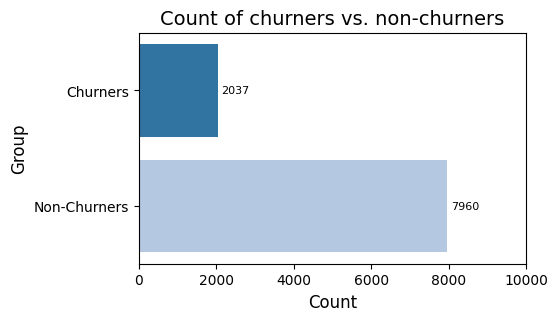

In [33]:
plt.figure(figsize=(5, 3))
sns.barplot(data=churn_df, x='Count', y='Group', palette='tab20', hue='Group', legend=False);

plt.title('Count of churners vs. non-churners', fontsize=14);
plt.xlabel('Count', fontsize=12);
plt.ylabel('Group', fontsize=12);
plt.xlim(0, 10000);

for i, row in enumerate(churn_df.itertuples()):
    plt.text(row.Count + 100, i, f"{row.Count:}", 
             va='center', fontsize=8)

In [34]:
# Explore the variables vs. the target
df.corr(numeric_only=True)

,CustomerId,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary
CustomerId,1.000000,-0.012257,0.016968,-0.014702,-0.006254,0.005495,0.009540,0.015328
Balance,-0.012257,1.000000,-0.304218,-0.012336,0.118582,0.006193,0.028192,0.012758
NumOfProducts,0.016968,-0.304218,1.000000,0.013319,-0.047966,0.012084,-0.030709,0.014187
Tenure,-0.014702,-0.012336,0.013319,1.000000,-0.014073,0.000657,-0.010040,0.007732
Exited,-0.006254,0.118582,-0.047966,-0.014073,1.000000,-0.027184,0.285329,0.012072
CreditScore,0.005495,0.006193,0.012084,0.000657,-0.027184,1.000000,-0.004012,-0.001416
Age,0.009540,0.028192,-0.030709,-0.010040,0.285329,-0.004012,1.000000,-0.007236
EstimatedSalary,0.015328,0.012758,0.014187,0.007732,0.012072,-0.001416,-0.007236,1.000000


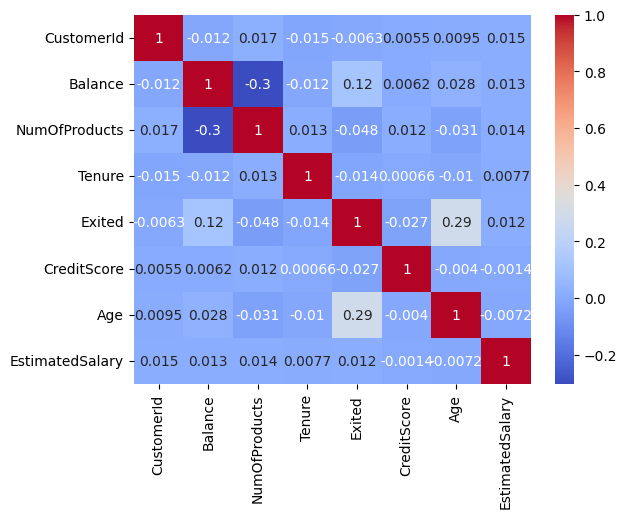

In [35]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True);

In [36]:
 # and look at the percentage of Churners by “Geography” and “Gender”

In [37]:
churn_geo = df.groupby(['Exited', 'Geography']).size().reset_index(name='Count')
churn_geo['Pct'] = churn_geo.groupby('Exited')['Count'].transform(lambda x: x / x.sum())

In [38]:
churn_geo

,Exited,Geography,Count,Pct
0,0,France,4203,0.528015
1,0,Germany,1694,0.212814
2,0,Spain,2063,0.259171
3,1,France,810,0.397644
4,1,Germany,814,0.399607
5,1,Spain,413,0.202749


In [39]:
geo_pivot = churn_geo.pivot(index='Exited', columns='Geography', values='Pct')

In [40]:
geo_pivot

Geography,France,Germany,Spain
Exited,,,
0,0.528015,0.212814,0.259171
1,0.397644,0.399607,0.202749


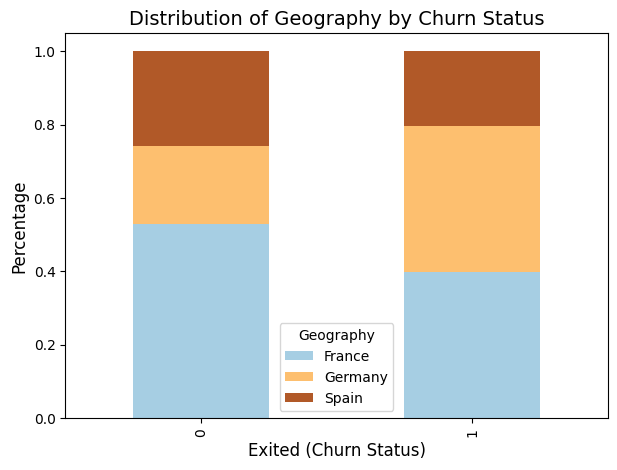

In [41]:
fig, ax = plt.subplots(figsize=(7, 5))
geo_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='Paired')
ax.set_title('Distribution of Geography by Churn Status', fontsize=14)
ax.set_xlabel('Exited (Churn Status)', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(title='Geography', fontsize=10)
plt.show()

In [42]:
churn_gender = df.groupby(['Exited', 'Gender']).size().reset_index(name='Count')
churn_gender['Pct'] = churn_gender.groupby('Exited')['Count'].transform(lambda x: x / x.sum())

In [43]:
churn_gender

,Exited,Gender,Count,Pct
0,0,Female,3402,0.427387
1,0,Male,4558,0.572613
2,1,Female,1139,0.559156
3,1,Male,898,0.440844


In [44]:
gender_pivot = churn_gender.pivot(index='Exited', columns='Gender', values='Pct')

In [45]:
gender_pivot

Gender,Female,Male
Exited,,
0,0.427387,0.572613
1,0.559156,0.440844


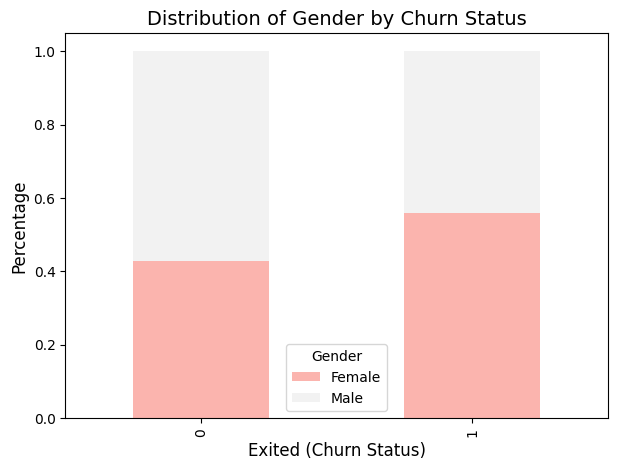

In [46]:
fig, ax = plt.subplots(figsize=(7, 5))
gender_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='Pastel1')
ax.set_title('Distribution of Gender by Churn Status', fontsize=14)
ax.set_xlabel('Exited (Churn Status)', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(title='Gender', fontsize=10)
plt.show()

In [47]:
# Build box plots for each numeric field, broken out by churners vs. non-churners
numeric_columns = ['Balance', 'NumOfProducts', 'Tenure', 'CreditScore', 'Age', 'EstimatedSalary']

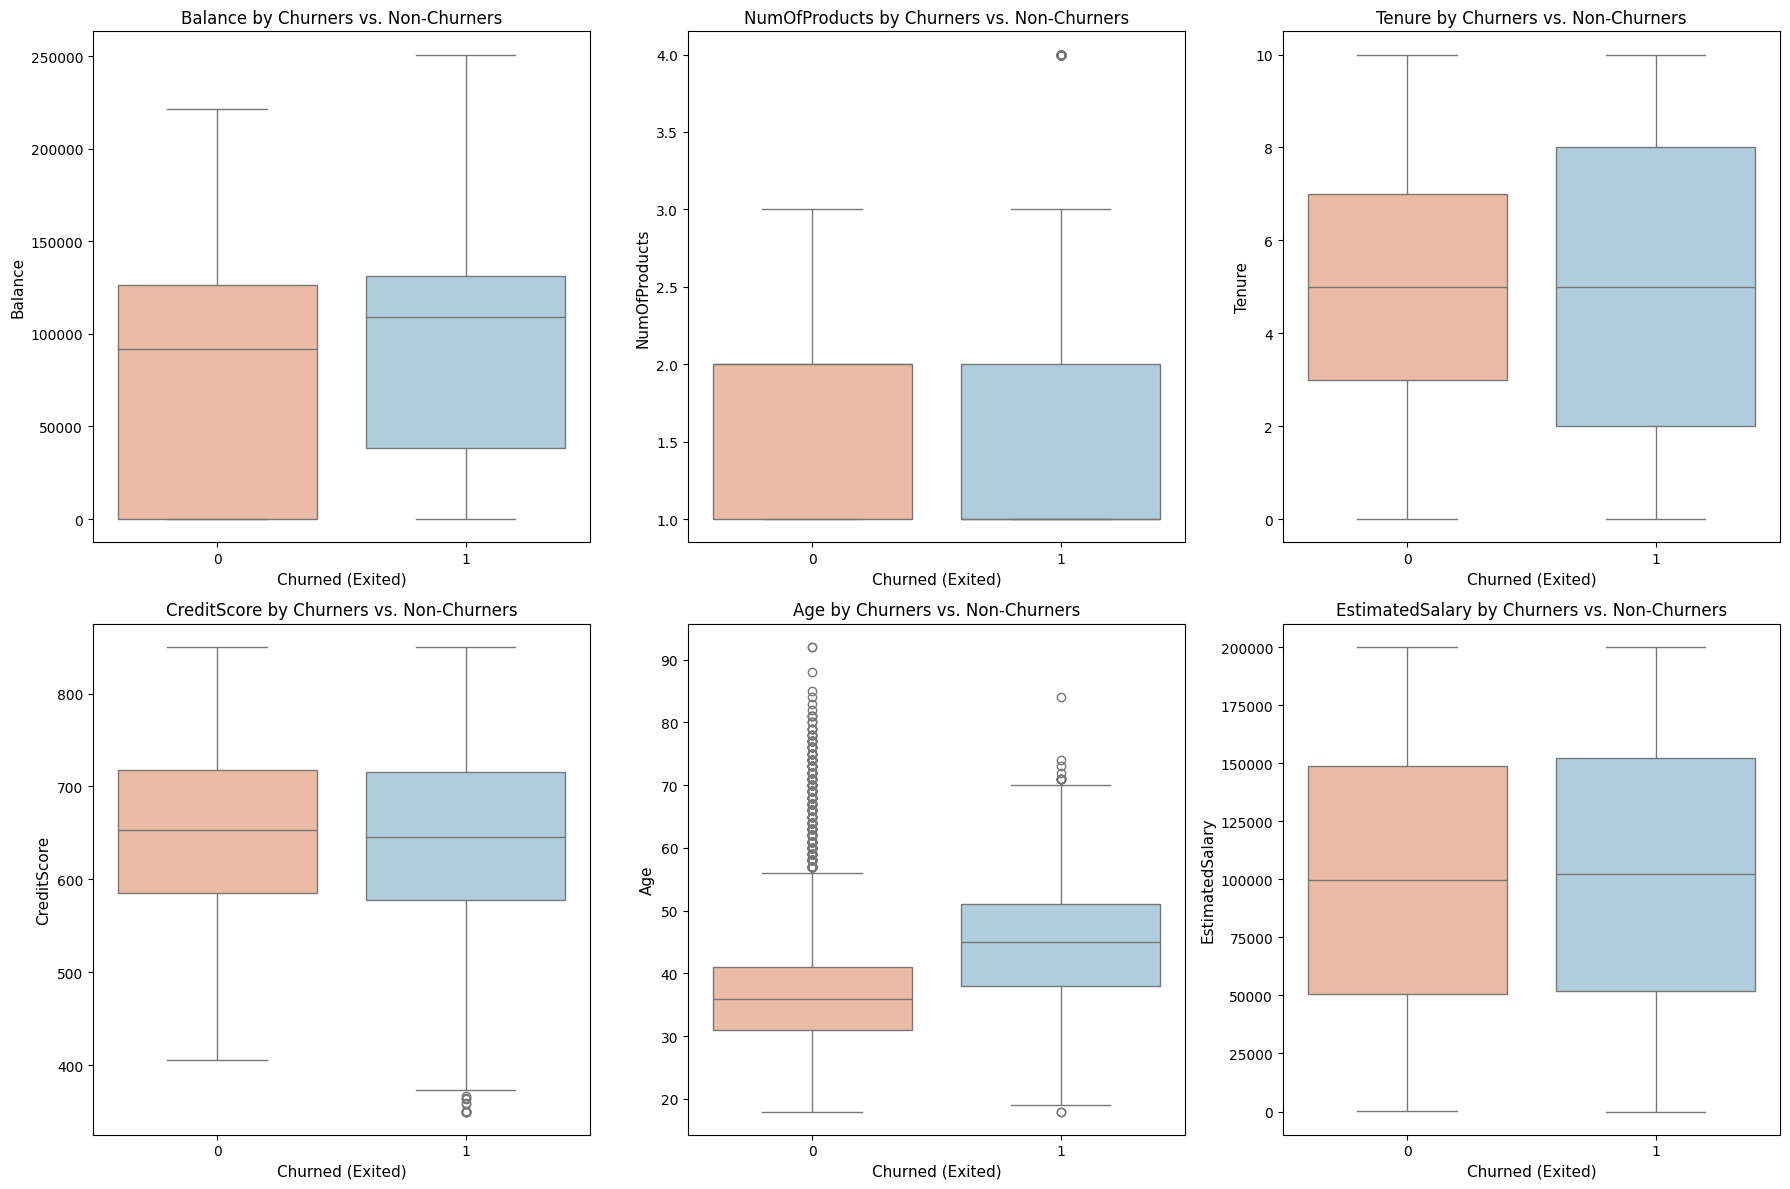

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x='Exited', y=column, palette='RdBu', hue='Exited', ax=axes[i], dodge=False, legend=False)    
    axes[i].set_title(f'{column} by Churners vs. Non-Churners', fontsize=12)
    axes[i].set_xlabel('Churned (Exited)', fontsize=11)
    axes[i].set_ylabel(column, fontsize=11)

plt.tight_layout()
plt.show()

In [49]:
# Build histograms for each numeric field, broken out by churners vs. non-churners

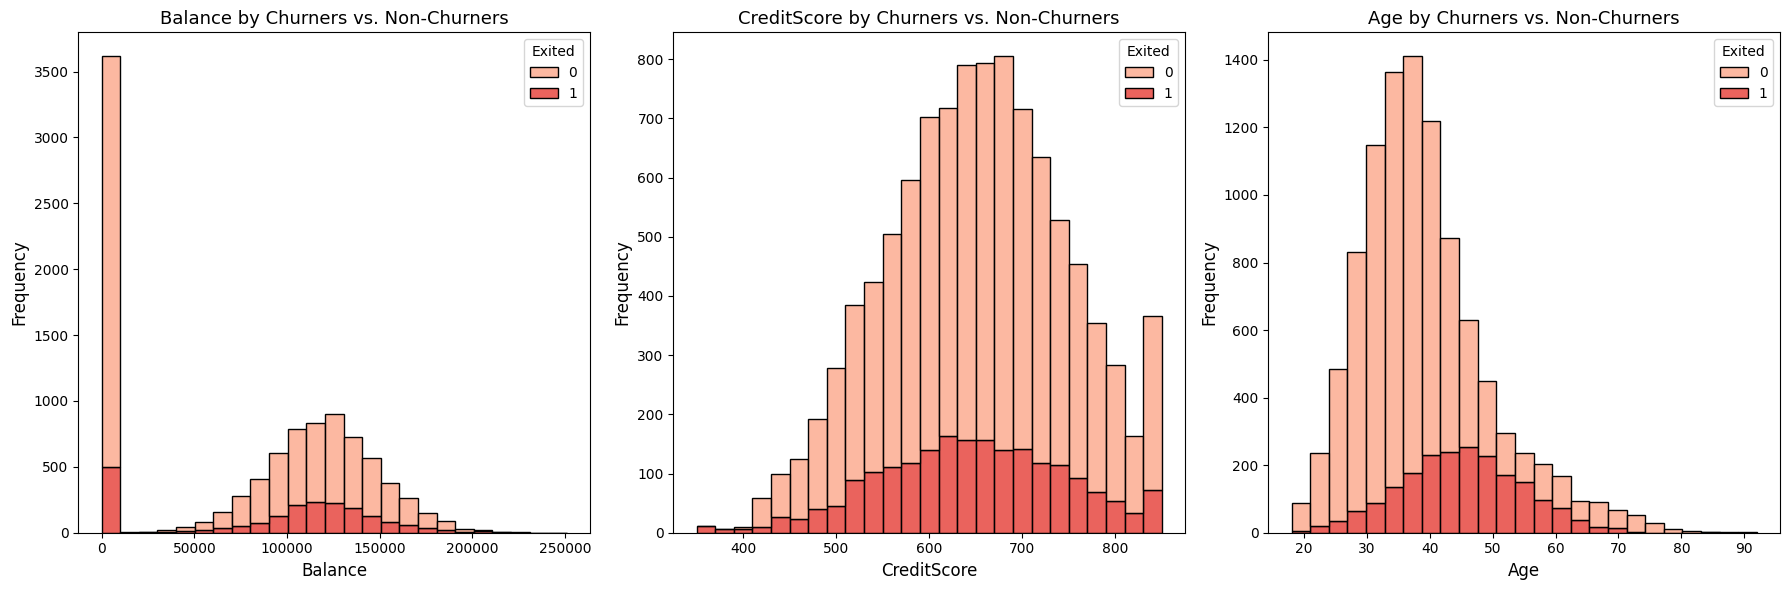

In [50]:
numeric_columns_short = ['Balance', 'CreditScore', 'Age']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

for i, column in enumerate(numeric_columns_short):
    sns.histplot(data=df, x=column, hue='Exited', multiple='stack', palette='Reds', ax=axes[i], kde=False, bins=25)
    axes[i].set_title(f'{column} by Churners vs. Non-Churners', fontsize=13)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [51]:
# Objective 4
# Prepare the data for modeling
# Your final objective is to prepare the data for modeling through feature selection, feature engineering, and data splitting.

In [52]:
# Create a new dataset that excludes any columns that aren’t be suitable for modeling

In [53]:
df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0.00,1,Yes,2,Yes,1,Hargrave,619,France,Female,42,101348.88
1,15647311,83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41,112542.58
2,15619304,159660.80,3,No,8,No,1,Onio,502,France,Female,42,113931.57
3,15701354,0.00,2,No,1,No,0,Boni,699,France,Female,39,93826.63
4,15737888,125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,15606229,0.00,2,No,5,No,0,Obijiaku,771,France,Male,39,96270.64
9993,15569892,57369.61,1,Yes,10,Yes,0,Johnstone,516,France,Male,35,101699.77
9994,15584532,0.00,1,Yes,7,Yes,1,Liu,709,France,Female,36,42085.58
9995,15682355,75075.31,2,No,3,No,1,Sabbatini,772,Germany,Male,42,92888.52


In [54]:
model_df = df.drop(['CustomerId', 'Surname'], axis=1)

In [55]:
model_df

,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScore,Geography,Gender,Age,EstimatedSalary
0,0.00,1,Yes,2,Yes,1,619,France,Female,42,101348.88
1,83807.86,1,Yes,1,Yes,0,608,Spain,Female,41,112542.58
2,159660.80,3,No,8,No,1,502,France,Female,42,113931.57
3,0.00,2,No,1,No,0,699,France,Female,39,93826.63
4,125510.82,1,Yes,2,Yes,0,850,Spain,Female,43,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9992,0.00,2,No,5,No,0,771,France,Male,39,96270.64
9993,57369.61,1,Yes,10,Yes,0,516,France,Male,35,101699.77
9994,0.00,1,Yes,7,Yes,1,709,France,Female,36,42085.58
9995,75075.31,2,No,3,No,1,772,Germany,Male,42,92888.52


In [56]:
# Create dummy variables for categorical fields

In [57]:
categorical_col = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']

In [58]:
model_df = pd.get_dummies(model_df, columns=categorical_col, drop_first=True, dtype=int)

In [59]:
model_df

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,HasCrCard_Yes,IsActiveMember_Yes,Geography_Germany,Geography_Spain,Gender_Male
0,0.00,1,2,1,619,42,101348.88,1,1,0,0,0
1,83807.86,1,1,0,608,41,112542.58,1,1,0,1,0
2,159660.80,3,8,1,502,42,113931.57,0,0,0,0,0
3,0.00,2,1,0,699,39,93826.63,0,0,0,0,0
4,125510.82,1,2,0,850,43,79084.10,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0.00,2,5,0,771,39,96270.64,0,0,0,0,1
9993,57369.61,1,10,0,516,35,101699.77,1,1,0,0,1
9994,0.00,1,7,1,709,36,42085.58,1,1,0,0,0
9995,75075.31,2,3,1,772,42,92888.52,0,0,1,0,1


In [60]:
# Create a new “balance_v_income” feature, which divides a customer’s bank balance by their estimated salary,
# then visualize that feature vs. churn status

In [61]:
model_df['balance_v_income'] = model_df.Balance / model_df.EstimatedSalary

In [62]:
model_df

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,HasCrCard_Yes,IsActiveMember_Yes,Geography_Germany,Geography_Spain,Gender_Male,balance_v_income
0,0.00,1,2,1,619,42,101348.88,1,1,0,0,0,0.000000
1,83807.86,1,1,0,608,41,112542.58,1,1,0,1,0,0.744677
2,159660.80,3,8,1,502,42,113931.57,0,0,0,0,0,1.401375
3,0.00,2,1,0,699,39,93826.63,0,0,0,0,0,0.000000
4,125510.82,1,2,0,850,43,79084.10,1,1,0,1,0,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0.00,2,5,0,771,39,96270.64,0,0,0,0,1,0.000000
9993,57369.61,1,10,0,516,35,101699.77,1,1,0,0,1,0.564108
9994,0.00,1,7,1,709,36,42085.58,1,1,0,0,0,0.000000
9995,75075.31,2,3,1,772,42,92888.52,0,0,1,0,1,0.808230


In [63]:
model_df = model_df[['Exited', 'Balance', 'NumOfProducts', 
                     'Tenure', 'CreditScore', 'Age',
                     'EstimatedSalary', 'balance_v_income', 'HasCrCard_Yes',
                     'IsActiveMember_Yes', 'Geography_Germany', 'Geography_Spain',
                     'Gender_Male']]

model_df.columns = model_df.columns.str.lower()

In [64]:
# the final dataframe that is ready to be input into a model!
model_df

,exited,balance,numofproducts,tenure,creditscore,age,estimatedsalary,balance_v_income,hascrcard_yes,isactivemember_yes,geography_germany,geography_spain,gender_male
0,1,0.00,1,2,619,42,101348.88,0.000000,1,1,0,0,0
1,0,83807.86,1,1,608,41,112542.58,0.744677,1,1,0,1,0
2,1,159660.80,3,8,502,42,113931.57,1.401375,0,0,0,0,0
3,0,0.00,2,1,699,39,93826.63,0.000000,0,0,0,0,0
4,0,125510.82,1,2,850,43,79084.10,1.587055,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0,0.00,2,5,771,39,96270.64,0.000000,0,0,0,0,1
9993,0,57369.61,1,10,516,35,101699.77,0.564108,1,1,0,0,1
9994,1,0.00,1,7,709,36,42085.58,0.000000,1,1,0,0,0
9995,1,75075.31,2,3,772,42,92888.52,0.808230,0,0,1,0,1
